<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Qubit by Qubit - Semester 2</h1>
<h3>Week 20: Linear Search and Deutsch-Josza Algorithm</h3>

</div>

# Overview 
1. [Introduction](#introduction) <br>
2. [Linear Search](#linear) <br>
    2.1 [Big-O notation](#bigO) <br>
3. [Extra content](#extra) <br>
    3.1 [The Deutsch-Josza Oracle](#djoracle) <br>
    3.2 [Deutsch-Josza algorithm implementation](#djfull) <br>
    3.3 [Binary search](#binary) <br>
    3.4 [Challenge problems](#challenge) <br>

<a id="introduction"></a>
# 1. Introduction

## What is a search algorithm?
[Search Algorithms](https://en.wikipedia.org/wiki/Search_algorithm) are designed to check for an element or retrieve an element from any data structure where it is stored. Based on the type of search operation, these algorithms are generally classified into two categories:

- **Sequential Search**: In this, the list or array is traversed sequentially and every element is checked. For example: Linear Search.

- **Interval Search**: These algorithms are specifically designed for searching in *sorted* data-structures. These type of searching algorithms are much more efficient than Linear Search as they repeatedly target the center of the search structure and divide the search space in half. For Example: Binary Search.

Algorithms are often evaluated by their computational complexity, or maximum theoretical run time. We will see more detail of this below.

In this lab, we will implement a linear search algorithm and analyze its complexity.


<a id="linear"></a>
# 2. Linear Search

Suppose you're scanning a list of the ages of people in your school or organization, and you want to find the person who is 19 years old. How would you go about this search problem?

One approach you might take is to start checking the age of each person one-by-one from the start of the list, and stop when you find the person who is 19 years old. This approach is called **linear search**.

Formally, linear search sequentially checks each element of the data set (size `n`) until a match is found or the whole set has been compared.

Let's implement linear search. To set up the search, we will use an array to store our data set. We'll indicate the element we want to find with `x`. 

In [1]:
import random


In [12]:
# Element we are looking for
x = 19
 # data set size
n = len(data)
print("Data Age :",data)

Data Age : [20, 10, 10, 3, 6, 19, 14, 6, 19, 9]


The linear search algorithm is:

1. Start from the leftmost element of the array and one by one compare `x` with each element of the data set.
2. If `x` matches with current element, return the index.
3. If `x` does not match the current element, move on to the next one.
3. If `x` doesn’t match with any of elements in the array, return `-1` (search failed, or element not found).

Let us generalize this search algorithm. We want to be able to use the same method to search any database and find the element we're looking for. It would be annoying if we had to write out the whole code every time we wanted to search. Therefore, we will define a **function** called `linear_search` that will do the job for us. This function will take two inputs - the dataset we want to search in, and the element we want to find. The function will produce two outputs - the element of the array at which the `x` is present, and number of steps it took to find the element we were looking for. Also, it is good practice to flag if the search failed and the element was not found. We will do this by making the function return -1 if the element was not found.

In [13]:
def linear_search(data, x): # Linear search function takes two inputs - the dataset and the element we want to find
      # Finding the length of the dataset
    n = len(data)
      # loop to scan each element sequentially
    for i,k in enumerate(data):
        if(k == x):     
         # Conditional statement to check if current value matches search value
            return (i+1,i)  # The function returns the array element, which is i, and the number of steps, which is i+1
    return (n,-1)# is search fails, the function returns -1, and the number of steps, which is i+1

Let's use the linear search function with the same array we had defined before to find `x = 20`

In [22]:
data = [random.randint(1,20) for i in range(10)] # data set
print("Data is :",data)
x = 19                                                             # element we want to find
steps, result =  linear_search(data,x)    # Call function
print("Element is present at index =", result, "and was found in", steps, "steps")

Data is : [5, 4, 4, 8, 15, 19, 13, 1, 8, 15]
Element is present at index = 5 and was found in 6 steps


Try out this function with different values of `x`!

**Questions on complexity:**
1. What is the **mimimum** number of steps that would be required in linear search, and when does this occur (the best-case complexity)?
- <font color='green'>1 STEP</font>
2. What is the **maximum** number of steps that would be required in linear search, and when does this occur (the worst-case complexity)?
- <font color='green'>N STEPs</font>

3. What is the **average** number of steps that would be required in linear search (the average complexity)?
- <font color='green'>N/2 STEPs</font>


<a id="bigO"></a>
## 2.1 Big-O notation
In the worst case, it takes **N** steps to find an element using linear search, where **N** is the size of the dataset. This is called **time complexity** and it is written with [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation), therefore, for *linear search* we have that its time complexity is **O(N)**, i.e. goes like a linear function.

<a id="extra"></a>
# 3. Extra content (strictly optional!!)

### <a id="djoracle"></a>
# 3.1 The Deutsch-Josza oracle

- The DJ algorithm allows us to determine if the function is constant or balanced with just one check, provided we express the function as an **oracle**.
- We know that we want our quantum states to be modified by the application of the function, so that we can figure out if the function is **constant or balanced**. Therefore, we will have to express the **function in the form of an operator**, or a gate. 
- Also, just like all other quantum operators, the gate we make for the function will have to be reversible. An **oracle** is exactly this reversible gate form of the function we want to check.

This is true for a lot of quantum algorithms - we need to express the problem in terms of an oracle to make a quantum circuit to solve it. In this lab, we will look at how a function that takes in a 1-bit input can be expressed as an oracle for the DJ algorithm. Next week, we will see oracles in the context of Grover's algorithm.

For the DJ algorithm, we will call our oracle $U_f$. Here is what the oracle we will look like:


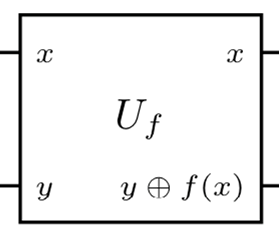


The oracle takes two qubits as inputs - $x$ and $y$. It performs an **XOR** operation on $y$ - the output is $y \oplus f(x)$. $x$ is unchanged. Let us check if this produced unique outputs:

For the first case,

| Input $$x$$ | Input $$y$$ |$$f(x)$$|$$y \oplus f(x)$$|
|:----:|:------:|:------:|:------:|
| 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 |
| 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 |

Here, we notice that $y \oplus f(x) = y$, which makes sense since $f(x) = 0$ and $y \oplus 0 = y$

For the second case,

| Input $$x$$ | Input $$y$$ |$$f(x)$$|$$y \oplus f(x)$$|
|:----:|:------:|:------:|:------:|
| 0 | 0 | 1 | 1 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 0 |

Here, we notice that $y \oplus f(x) = \bar{y}$, which makes sense since $f(x) = 1$ and since $y \oplus 1 = \bar{y}$

For the third case,

| Input $$x$$ | Input $$y$$ |$$f(x)$$|$$y \oplus f(x)$$|
|:----:|:------:|:------:|:------:|
| 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 1 | 0 |

Here, we notice that $y \oplus f(x) = y \oplus x$, which makes sense, since $f(x) = x$. This is a CNOT between x and y!

For the last case,

| Input $$x$$ | Input $$y$$ |$$f(x)$$|$$y \oplus f(x)$$|
|:----:|:------:|:------:|:------:|
| 0 | 0 | 1 | 1 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 |

Here, we notice that $y \oplus f(x) = y \oplus \bar{x}$, which makes sense, since $f(x) = \bar{x}$. This is a CNOT between $\bar{x}$ and y!


Notice how, by using the oracle formulation, we've transformed the problem into a reversible operator on the inputs.

Let us make each of these oracles. We will define a function for the constant oracles, and a separate function for the balanced oracles. Each function will have two inputs - which of the two choices for constant or balanced oracle we want, and the quantum circuit to which we want to add the oracle.

First let us define the constant oracle function. Here, we'll fix the convention that if the first input is 0, we want the case where $f(x) = 0$, and if it is one, we want $f(x) = 1$

In [45]:
def constant_oracle(n,qc):
    if (n==0):  # We want to oracle with f(x) = 0
        pass
    else:  # We want to oracle with f(x) = 1
        qc.x(1)

Next, let us define the balanced oracle function. Here, we'll fix the convention that if the first input is 0, we want the case where $f(x) = x$, and if it is one, we want $f(x) = \bar{x}$

In [41]:
def balanced_oracle(n,qc):
    if (n==0):  # We want the balanced oracle where f(x) = x. In this case, the outputs correspond to a CNOT function
        qc.cx(0,1)
    else: # We want the balanced oracle where f(x) = \bar{x}
        qc.x(0)
        qc.cx(0,1)

In [33]:
import qiskit as q

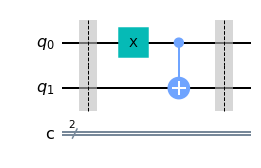

In [47]:
qc = QuantumCircuit(2,2)
qc.barrier()
oracle = balanced_oracle(1,qc)
qc.barrier()
qc.draw('mpl')

<a id="djfull"></a>
## 3.2 The Deutsch-Josza Algorithm implementation

Now, we will implement the full DJ algorithm. First, let's create a function to call one of our oracles at random. Our problem will be to figure out if the oracle is constant or balanced.

In [2]:
from random import getrandbits

In [38]:
def random_oracle(qc):
    n = getrandbits(1)
    if(n==0):
        print("Got n as 0. Making a consant oracle...")
        constant_oracle(getrandbits(1),qc)
    else:
        print("Got n as 1. Making balanced oracle")
        balanced_oracle(getrandbits(1),qc)

Here are the steps of the DJ algorithm for a single-bit function:
1. Initiate a quantum circuit of two qubits
2. Apply an X gate to $q_1$
3. Apply H gates to both $q_0$ and $q_1$
4. Apply the oracle to $q_0$ and $q_1$
5. Apply H gates to both $q_0$ and $q_1$
6. Measure $q_0$. If the result is 0, the oracle is constant. If it is 1, the oracle is balanced.

Notice that we only invoked the oracle (i.e. applied the function) once in this algorithm.

Got n as 0. Making a consant oracle...


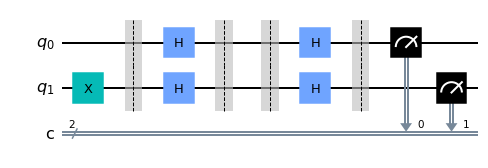

In [45]:
qc = q.QuantumCircuit(2,2)
qc.x(1)    # Step 2
qc.barrier()
qc.h(0)    # Step 3
qc.h(1)    # Step 3
qc.barrier()
random_oracle(qc)  # Step 4
qc.barrier()
qc.h(0) # Step 5
qc.h(1) # Step 5
qc.barrier()
qc.measure([0,1],[0,1]) # Step 6
qc.draw('mpl')

In [44]:
backend = q.Aer.get_backend('qasm_simulator')
job = q.execute (qc, backend, shots = 1024)
results = job.result()
counts = results.get_counts(qc)
print(counts)

{'11': 1024}


<a id="binary"></a>
## 3.3 Binary Search

This type of search requires that the data set be sorted.

The algorithm to follow is:

1. Compare `x` (target element) to the middle element of the array (`n/2`).
2. If `x` matches with middle element, we return the mid index.
3. Else, If `x` is greater than the mid element, then `x` can only lie in right half subarray after the mid element. So we recur for right half.
4. Else (`x` is smaller) recur for the left half.
5. Repeat steps 1 to 4 until `x` is found.
6. If the search ends with the remaining half being empty, `x` is not in the array, then return `-1` (not found).



In [ ]:
data.sort()                                                         # data set must be sorted
print(data)

In [ ]:
def binary_search(data, left, right, x): 

    steps = 0
    
    while left <= right:
        
        steps += 1
  
        mid = left + (right - left) // 2; 
          
        # Check if x is present at mid 
        if data[mid] == x: 
            return mid, steps
  
        # If x is greater, ignore left half 
        elif data[mid] < x: 
            left = mid + 1
  
        # If x is smaller, ignore right half 
        else: 
            right = mid - 1
      
    # If we reach here, then the element 
    # was not present 
    return -1, steps

In [ ]:
def search_element_binary(data, n, x):
    
    result, steps = binary_search(data, 0, n-1, x)                  # function call

    if(result == -1):
        print("Binary :::: Element is not present in data set and", steps,"steps were executed")
    else:
        print("Binary :::: Element is present at index =", result, "and was found in", steps, "steps")


In [ ]:
x = 20                                                              # element we want to find
search_element_binary(data, n, x)

Now let's find the element that is at the end of the array:

In [ ]:
x = 109                                                             # element we want to find, last in array
search_element_binary(data, n, x)

If we try to find an element not present in data set, then the number of steps to execute will be the maximum:

In [ ]:
x = 21                                                              # element we want to find, but it isn't presente
search_element_binary(data, n, x)

As we can see, the binary search is more efficient since it takes fewer steps to find an element (or determine that it is not present in the data set). However, this algorithm has the restriction that the elements of the data set must be previously sorted.

Then, once the elements are sorted, the time complexity for the binary search is **O(log$_2$ n)**, i.e. goes like an logarithm function.

<br>

***
> Where **log$_2$** is the [logarithm](https://en.wikipedia.org/wiki/Logarithm) function base $2$. In general a logartihm base $b$ is given by:
> 
> $$\log_b(x) = y \iff b^y=x \; \; \; , \; \; \; x>0 \; \; \; , \; \; \; b>0 \; \; \; , \; \; \; b\neq1$$
> 
> For example, $\log_2 64 = 6$, as $2^6 = 64$
***

The way the binary search works is shown in the following image:

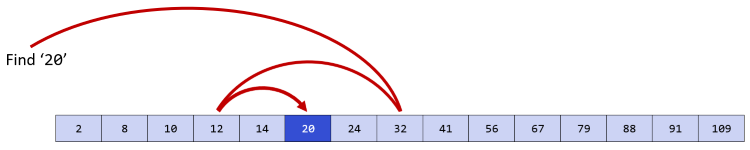

<br>

**We can conclude that indeed the binary search is much better than the linear search, if and only if the data set is *sorted*.**

**What if it is not possible to pre-sorter the data set?**

**Or is it too expensive?**

<a id="challenge"></a>
## 3.4 Challenge problems

**Problem 1.** Suppose we have an unsorted list, and we want to find an element in it using binary search. We could do this in two steps:
    a. Sort the list <br>
    b. Perform binary search <br>
1. Design an algorithm to sort the list, and estimate its complexity. <br>
2. What is the overall complexity of this two-step process? <br>

**Problem 2.** In lab we looked at the Deutsch-Josza oracle for a function that takes a single-bit as input. Create an implementation of the Deutsch-Josza oracle for a function that takes 2-bit inputs. The function still produces 1-bit output. In this case, the function is constant is the output is 0 for all 4 input combinations, and it is balanced if the output is 0 for two input combinations and 1 for the other two. Next, implement the D-J algorithm with this oracle. Can you generalize this to n bits?

## Deutsch-Josza for N bits
- Combinations are 000,001,010,011,100,101,110,111 as there is a y qubit involved.
- So, we have eight possible places to make the function 0 or 1.
### Ways to make it constant 
- 2 ways
### Ways to make it balanced 
- 8C4 ways 
-> Basically we want the function to be balanced or constant randomly 

## For n bits 
- Basically just apply an MCX gate whenever f(x) is 1 for an input combination and nothing when it is zero

In [3]:
from qiskit import *
from random import getrandbits
import numpy as np
def get_function(n):
    '''Get the function for the 2^n inputs'''
    inputs = 2**(n) 
    bit = getrandbits(1)
    func = []
    
    # is bit is 0 -> constant 
    if bit == 0:
        print("Constant function selected!")
        one = getrandbits(1)
        if one is True:
            func = [1 for _ in range(inputs)]
        else:
            func = [0 for _ in range(inputs)]
        func.insert(0,'constant')
    # is bit is 1 -> balanced
    else:
        print("Balanced function selected!")
        func.append('balanced')
        per = np.random.permutation(inputs)
        for k in per:
            # at even you get 0, at odd you get 1 
            # since even number of elements, always equal
            # zeroes and ones :)
            func.append(k%2)
    
    return func

In [14]:
def get_oracle(function):
    qubits = int(np.log2(len(function)-1))
    qc = QuantumCircuit(qubits, name='Oracle')
    # now see what type of function is it
    if(function[0] == 'balanced'):
        function = function[1:]
        # wherever it is 0, don't do anyhing
        for i, k in enumerate(function):
            if k == 1:
                # first get the binary representation of i
                b = bin(i)[2:]
                b = b.zfill(qubits)[:qubits-1]
                # apply xs
                qc.barrier()
                for j, h in enumerate(b):
                    if(h == '1'):    
                        qc.x(j)
                # apply mcx
                qc.mcx([i for i in range(qubits-1)], qubits-1)
                # reverse the operation
                for j, h in enumerate(b):
                    if(h == '1'):
                        qc.x(j)
                qc.barrier()
            else:
                pass
    else:
        function = function[1:]
        if(sum(function) == 0):
            pass
        else:
            qc.x(qubits-1)
    return qc

Balanced function selected!
['balanced', 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1]


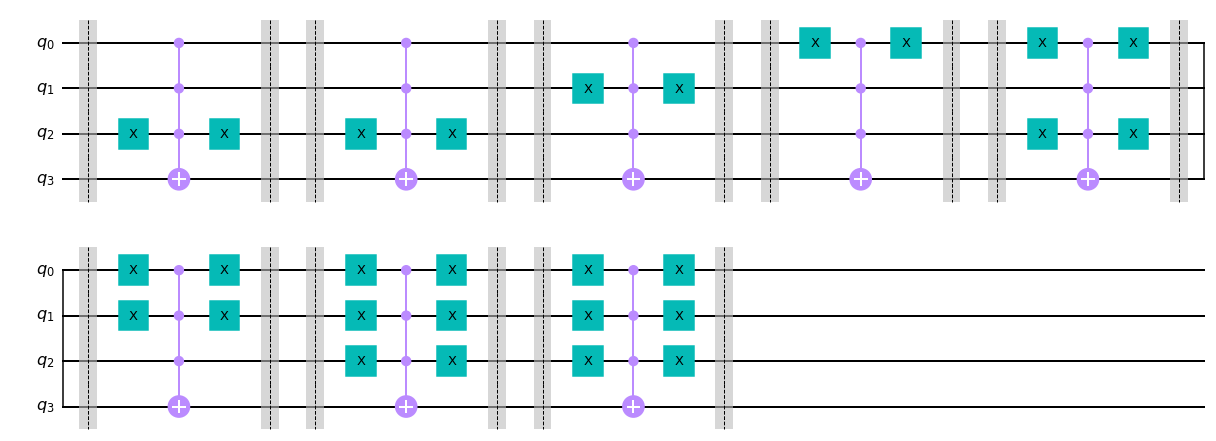

In [18]:
func = get_function(4)
oracle = get_oracle(func)
print(func)
display(oracle.draw('mpl'))

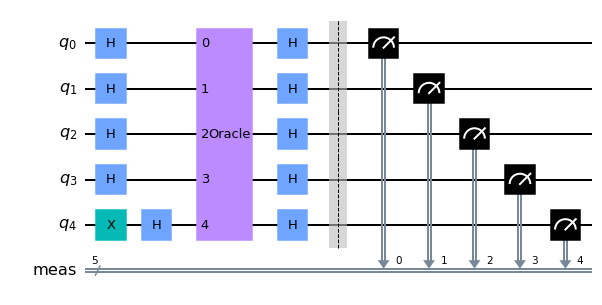

In [241]:
q = QuantumCircuit(5)
q.x(4)
q.h([0,1,2,3,4])
q.append(oracle,q.qubits,q.clbits)
q.h([0,1,2,3,4])
q.measure_all()
q.draw('mpl')

{'10000': 3000}


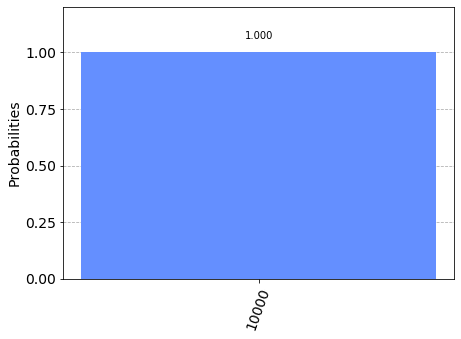

In [242]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(q,backend = backend,shots=3000).result().get_counts()
print(counts)
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)